In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

In [2]:
# install the nsepy library to get stock prices
# !pip install nsepy 

  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36088 sha256=18d8bf6f397c30f4c448775d68133dc1f54193e27d03c0a30c0db7c30c3032df
  Stored in directory: c:\users\arun\appdata\local\pip\cache\wheels\b9\2c\cb\d74199e422a1dbc20297d10cfff9c54d03e0b5c6694d49ccdd
Successfully built nsepy


In [4]:
# Getting Stock data using nsepy library
from nsepy import get_history
from datetime import datetime

startDate=datetime(2019, 1,1)
endDate=datetime(2020, 7, 30)

# Fetching the data
StockData=get_history(symbol='INFY', start=startDate, end=endDate)
print(StockData.shape)
StockData.head()

(390, 14)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2019-01-01,INFY,EQ,658.95,660.95,666.3,654.15,665.95,665.05,660.66,2943390,1.944579e+14,45422,1282161,0.4356
2019-01-02,INFY,EQ,665.05,666.00,674.0,662.05,668.00,669.05,669.97,7416655,4.968963e+14,108094,3880800,0.5233
2019-01-03,INFY,EQ,669.05,672.00,677.0,663.10,668.00,669.15,669.66,6827249,4.571929e+14,125781,3676359,0.5385
2019-01-04,INFY,EQ,669.15,671.75,673.9,651.00,660.25,661.05,660.17,7889310,5.208305e+14,187590,3747741,0.4750
2019-01-07,INFY,EQ,661.05,665.00,673.6,661.50,671.70,671.70,667.51,8046340,5.370974e+14,132736,4711672,0.5856


In [5]:
# Creating a column as date
StockData['TradeDate']=StockData.index
StockData.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,TradeDate
Date,,,,,,,,,,,,,,,
2020-07-24,INFY,EQ,907.95,903.25,925.75,903.25,921.20,922.85,915.28,18209670,1.666699e+15,240036,5807097,0.3189,2020-07-24
2020-07-27,INFY,EQ,922.85,921.55,952.80,918.65,947.15,948.45,939.16,16828218,1.580444e+15,278528,5906860,0.3510,2020-07-27
2020-07-28,INFY,EQ,948.45,946.00,967.55,941.20,960.60,962.85,953.58,15819466,1.508506e+15,220010,5480184,0.3464,2020-07-28
2020-07-29,INFY,EQ,962.85,953.25,960.00,943.60,951.95,954.15,952.22,11152710,1.061982e+15,212215,4338542,0.3890,2020-07-29
2020-07-30,INFY,EQ,954.15,962.00,972.65,958.75,962.15,961.45,965.59,12492569,1.206274e+15,222807,5962965,0.4773,2020-07-30


### Plotting the closing  prices of stock

<AxesSubplot:xlabel='TradeDate'>

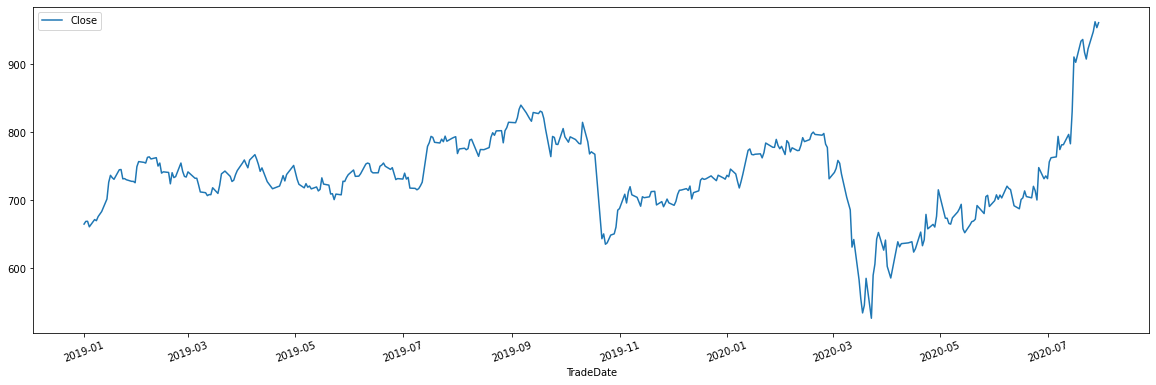

In [6]:
%matplotlib inline
StockData.plot(x='TradeDate', y='Close', kind='line', figsize=(20,6), rot=20)

### Preparing the data

In [7]:
df1=StockData.reset_index()['Close']

In [8]:
df1.shape

(390,)

### LSTM are sensitive to the scale of the data.So we apply MINMAX scaler

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [44]:
df1.shape

(390, 1)

In [11]:
## splitting dataset
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(253, 137)

In [13]:
len(train_data),len(test_data)

(253, 137)

In [14]:

# convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX, dataY= [],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and t+4
time_step=10
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test= create_dataset(test_data,time_step)

In [16]:
print(X_train.shape),print(y_train.shape)

(242, 10)
(242,)


(None, None)

In [17]:
print(X_test.shape),print(y_test.shape)

(126, 10)
(126,)


(None, None)

In [45]:
# reshape into to be [sample,time steps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [52]:
y_train=y_train.reshape(y_train.shape[0], 1)
y_test=y_test.reshape(y_test.shape[0], 1)

In [53]:
X_train.shape,X_test.shape

((242, 10, 1), (126, 10, 1))

In [54]:
y_train.shape,y_test.shape

((242, 1), (126, 1))

### Create the Stacked LSTM model

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [56]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [58]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 5, epochs = 100,verbose=1)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/100
49/49 [==============================] - 10s 46ms/step - loss: 0.0956 - val_loss: 0.0210
Epoch 2/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0054 - val_loss: 0.0209
Epoch 3/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0043 - val_loss: 0.0202
Epoch 4/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0050 - val_loss: 0.0182
Epoch 5/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0045 - val_loss: 0.0172
Epoch 6/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0041 - val_loss: 0.0165
Epoch 7/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0039 - val_loss: 0.0165
Epoch 8/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0035 - val_loss: 0.0159
Epoch 9/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0034 - val_loss: 0.0151
Epoch 10/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0036 - val_loss: 0.017

49/49 [==============================] - 1s 13ms/step - loss: 9.7712e-04 - val_loss: 0.0042
Epoch 82/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0014 - val_loss: 0.0033
Epoch 83/100
49/49 [==============================] - 1s 13ms/step - loss: 6.8809e-04 - val_loss: 0.0030
Epoch 84/100
49/49 [==============================] - 1s 13ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 85/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0010 - val_loss: 0.0037
Epoch 86/100
49/49 [==============================] - 1s 13ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 87/100
49/49 [==============================] - 1s 13ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 88/100
49/49 [==============================] - 1s 13ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 89/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 90/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0012 - val_loss: 0.

In [67]:
train_predict=model.predict(X_train)

In [68]:
test_predict=model.predict(X_test)

In [69]:
train_predict=scaler.inverse_transform(train_predict)

In [70]:
test_predict=scaler.inverse_transform(test_predict)

In [72]:
y_train=scaler.inverse_transform(y_train)

In [73]:
y_test=scaler.inverse_transform(y_test)

### Measuring the Accuracy of predictions (RMSE)

In [74]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

13.004850806644363

In [75]:
math.sqrt(mean_squared_error(y_test,test_predict))

24.147717570312384

### Measuring the Accuracy of predictions (MAPE)

In [76]:
# Accuracy of the predictions
100 - (100*(abs(y_train-train_predict)/y_train)).mean()

98.88252734806161

In [77]:
# Accuracy of the predictions
100 - (100*(abs(y_test-test_predict)/y_test)).mean()

97.56097287845299

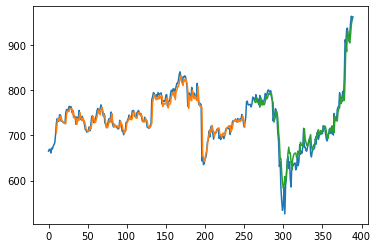

In [78]:
import matplotlib.pyplot as plt
### Plotting
# shift train prediction for plotting
look_back=10
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
# shift test prediction for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]= np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [79]:
len(test_data)

137

In [80]:
x_input=test_data[127:].reshape(1,-1)
x_input.shape

(1, 10)

In [81]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [82]:
temp_input

[0.8631989000916589,
 0.9345783684692941,
 0.94019248395967,
 0.8969981668194318,
 0.8741979835013749,
 0.9083409715857014,
 0.9670027497708527,
 0.9999999999999998,
 0.9800641613198897,
 0.9967919340054994]

In [83]:
# demonstrate prediction for next 10 days
from numpy import array

first_output=[]
n_steps=10
i=0
while(i<10):
    if(len(temp_input)>10):
        x_input=np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
#         print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        first_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input= x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
#         print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        first_output.extend(yhat.tolist())
        i=i+1
        
print(first_output)

[[0.9973114132881165], [0.9833081364631653], [0.9793674349784851], [0.9781714081764221], [0.9770151972770691], [0.9767161011695862], [0.9765327572822571], [0.9760910868644714], [0.9752358794212341], [0.9742307066917419]]


In [84]:
# first_output=scaler.inverse_transform(first_output)
first_output

[[0.9973114132881165],
 [0.9833081364631653],
 [0.9793674349784851],
 [0.9781714081764221],
 [0.9770151972770691],
 [0.9767161011695862],
 [0.9765327572822571],
 [0.9760910868644714],
 [0.9752358794212341],
 [0.9742307066917419]]

In [85]:
df1.shape

(390, 1)

In [86]:
day_new=np.arange(1,391)
day_pred=np.arange(391,401)

In [87]:
import matplotlib.pyplot as plt

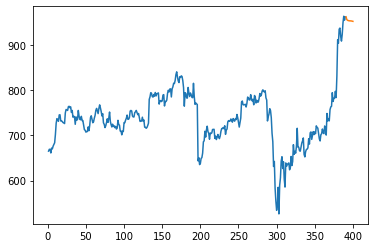

In [88]:
plt.plot(day_new,scaler.inverse_transform(df1))
plt.plot(day_pred,scaler.inverse_transform(first_output))

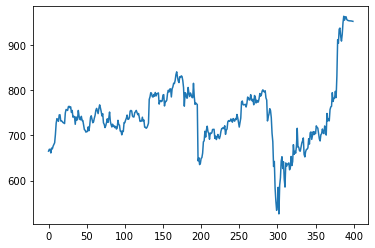

In [89]:
df2=scaler.inverse_transform(df1)
df3=df2.tolist()
df3.extend(scaler.inverse_transform(first_output))
plt.plot(df3)